<a href="https://colab.research.google.com/github/psl-skok/PoliticalSentimentAnalysis/blob/main/PoliticalSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment and Emotion Analysis of Political Subreddits Over Time**
**Patrick Leary and Paul Skok**

---

In this project, we analyze the sentiment and emotion of hundreds of thousands of comments from political subreddits between 2020 and 2024. We compare the sentiment and emotions between left leaning and right leaning subreddits at different times and discuss why we might observe some differences.

Write-up: https://docs.google.com/document/d/15BtjCK3yZl-UmYoEFYJbWrTkN6B0iZqHVPY15rN4eZA

Links to the data sources can be found here:
https://drive.google.com/drive/u/1/folders/1xcEhtoVrIWVByhD9XWwk0mnteDY7udsy

Mount google drive to access files

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Import all necessary libraries and packages

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#sentiment analysis
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#emotion detection
from transformers import pipeline

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Section 1: Read and Clean Data

First we need to read in the two datasets and combine them. Next, we organize the subreddits into three categories: right, left, and other. After organizing the subreddits, we filter out all comments that are in 'other' subreddits to just focus on the left and right leaning comments.

In [ ]:
path = "/content/drive/MyDrive/S6/CSC_372/final_project_data/"

#read csvs and combine them
dem_df = pd.read_csv(path + 'reddit_opinion_democrats.csv')
rep_df = pd.read_csv(path + 'reddit_opinion_republican.csv')
combined_df = pd.concat([dem_df, rep_df], ignore_index=True)
combined_df.drop_duplicates(inplace=True)

#separate subreddits into left, right, and other, and filter out other subreddits
right = ['Conservative', 'conservatives', 'Republican', 'RepublicanValues', 'ConservativesOnly', 'Republican_memes', 'republicanmemes']
left = ['neoliberal', 'voteDEM', 'democrats', 'progressive', 'ChristianDemocrat', 'WayOfTheBern', 'SandersForPresident']
combined_df = combined_df.assign(political_side = np.where(combined_df['subreddit'].isin(right), 'right',
                                                  np.where(combined_df['subreddit'].isin(left), 'left', 'other'))
                                )
filtered_df = combined_df.query("political_side != 'other'")

#select only the columns we need
selected_columns = ['comment_id', 'self_text', 'subreddit', 'created_time', 'post_id', 'controversiality', 'post_score', 'post_self_text', 'post_title', 'post_upvote_ratio', 'post_created_time', 'political_side']
filtered_df = filtered_df[selected_columns]
display(filtered_df)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/S6/CSC_372/final_project_data/reddit_opinion_democrats.csv'

## Section 2: Sentiment Analysis and Emotion Detection

### Sentiment Analysis

We are using NLTK's built in Vader sentiment analyzer. We run this model on every comment in our dataset and get four numbers for each comment: The negative sentiment, the positive sentiment, the neutral sentiment, and the overall sentiment.

In [ ]:
sid = SentimentIntensityAnalyzer()

#make a copy of filtered dataframe to store sentiment data
sentiment_df = filtered_df.copy()

#run sentiment analysis model on each comment
sentiment_df[['comment_neg', 'comment_neu', 'comment_pos', 'comment_compound']] = sentiment_df['self_text'].astype(str).apply(lambda x: pd.Series(sid.polarity_scores(x)))

display(sentiment_df)

,comment_id,self_text,subreddit,created_time,post_id,controversiality,post_score,post_self_text,post_title,post_upvote_ratio,post_created_time,political_side,comment_neg,comment_neu,comment_pos,comment_compound
2,l06hcsw,tail has been wagging the dog for like 30 years,neoliberal,2024-04-18 18:16:57,1c6wz6y,0,0,The [discussion thread](https://neoliber.al/dt...,Discussion Thread,0.46,2024-04-18 07:00:21,left,0.000,0.783,0.217,0.3612
4,l06hc18,"My response:\n\n1. TLDR;\n2. Fuck You, Bernie!",WayOfTheBern,2024-04-18 18:16:50,1c6sk0h,0,6,I got this letter from Bernie. You may have t...,Letter from Bernie (emphasis mine),0.88,2024-04-18 02:39:27,left,0.351,0.649,0.000,-0.5848
9,l06h7xq,u/OkVariety6275 is hard at work translating hi...,neoliberal,2024-04-18 18:16:12,1c6wz6y,0,0,The [discussion thread](https://neoliber.al/dt...,Discussion Thread,0.46,2024-04-18 07:00:21,left,0.272,0.728,0.000,-0.8625
15,l06h5bx,The dynamic isn't AAA versus AA/indie but the ...,neoliberal,2024-04-18 18:15:48,1c6wz6y,0,0,The [discussion thread](https://neoliber.al/dt...,Discussion Thread,0.46,2024-04-18 07:00:21,left,0.000,0.799,0.201,0.8689
16,l06h38v,this was why I theorized that it would benefit...,neoliberal,2024-04-18 18:15:30,1c76evp,0,153,In a letter to Secretary of State Frank LaRose...,Ohio GOP leaders reject Democrats' plan to get...,0.96,2024-04-18 15:38:09,left,0.000,0.638,0.362,0.6249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2812715,flk9kkw,Anti trust doesn't have anything to do with co...,ChristianDemocrat,2020-03-26 15:31:28,fp4g9x,0,3,How expansive should ATL (anti trust legislati...,Thoughts on Anti-Trust legislation?,0.72,2020-03-26 03:32:51,left,0.066,0.855,0.079,-0.0181
2812716,flk8yiy,"But, without anti trust legislation, how do yo...",ChristianDemocrat,2020-03-26 15:25:40,fp4g9x,0,3,How expansive should ATL (anti trust legislati...,Thoughts on Anti-Trust legislation?,0.72,2020-03-26 03:32:51,left,0.078,0.592,0.330,0.9856
2812717,flk8cjz,"No. Corporations form monopolies, because the ...",ChristianDemocrat,2020-03-26 15:19:52,fp4g9x,0,3,How expansive should ATL (anti trust legislati...,Thoughts on Anti-Trust legislation?,0.72,2020-03-26 03:32:51,left,0.123,0.787,0.090,-0.4925
2812718,flk75fk,Oh sorry. What makes you think anti trust legi...,ChristianDemocrat,2020-03-26 15:08:20,fp4g9x,0,3,How expansive should ATL (anti trust legislati...,Thoughts on Anti-Trust legislation?,0.72,2020-03-26 03:32:51,left,0.224,0.655,0.120,-0.2168


Then, we write the dataset with the sentiment analysis to a new csv so that we can read it in the future rather than running the sentiment analysis model again.

In [ ]:
sentiment_df.to_csv('/content/drive/MyDrive/S6/CSC_372/final_project_data/reddit_data_with_sentiment.csv', index=False)

This code reads in the csv that we have just created.
<br>
We do not need to run this code unless we have restarted the application; it just serves to run the code more efficiently.


In [ ]:
path = "/content/drive/MyDrive/S6/CSC_372/final_project_data/"
sentiment_df = pd.read_csv(path + 'reddit_data_with_sentiment.csv')

### Emotion Detection

Now, we run the emotion detection model. This model takes even longer to run than the sentiment analysis, so we split the data into months and run the model on a random sample of the data. We chose 100 comments from each party for each month. Because we are running this model on a random sample, results may vary for this portion of the analysis. We also write this data to a csv so that we can run the code more efficiently later on and have consistent results.

In [ ]:
emotion_model = pipeline("text-classification", model="michellejieli/emotion_text_classifier")

def get_emotion(text):
    result = emotion_model(text)[0]
    return pd.Series({'emotion_label': result['label'], 'emotion_score': result['score']})

#we will store the emotion data in a new df
emotion_df = filtered_df.copy()

emotion_df['self_text'] = emotion_df['self_text'].astype(str)

#the model only works for data less than or equal to 512 characters, so we filter out all comments above that length
emotion_df = emotion_df[emotion_df['self_text'].str.len() <= 512]

emotion_df['created_time'] = pd.to_datetime(emotion_df['created_time'])

#group data by month and select up to 100 comments from each political side each month
emotion_df = emotion_df.groupby([pd.Grouper(key='created_time', freq='M'), 'political_side']).apply(lambda x: x.sample(n=min(len(x), 100), replace=False)).reset_index(drop=True)

#apply the emotion detection model to the filtered DataFrame
emotion_df[['emotion_label', 'emotion_score']] = emotion_df['self_text'].apply(get_emotion)

display(emotion_df)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.09k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/413 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

,comment_id,self_text,subreddit,created_time,post_id,controversiality,post_score,post_self_text,post_title,post_upvote_ratio,post_created_time,political_side,emotion_label,emotion_score
0,fj2kzic,Angela Merkel is just another run-of-the-mill ...,ChristianDemocrat,2020-02-29 03:19:49,fb5pb7,0,3,Christian Democrats are a diverse bunch. I’m i...,Thoughts on Angela Merkel?,0.80,2020-02-29 02:18:18,left,neutral,0.843304
1,fj4jo3v,"Ohh sounds gd tbf, if she was leader I doubt A...",ChristianDemocrat,2020-02-29 20:57:09,fb5pb7,0,3,Christian Democrats are a diverse bunch. I’m i...,Thoughts on Angela Merkel?,0.80,2020-02-29 02:18:18,left,neutral,0.975251
2,fj4habh,Annegret karrenbauer was her name. She’s a mor...,ChristianDemocrat,2020-02-29 20:30:48,fb5pb7,0,3,Christian Democrats are a diverse bunch. I’m i...,Thoughts on Angela Merkel?,0.80,2020-02-29 02:18:18,left,neutral,0.984238
3,fj46q1o,Just another neo Liberal stooge ain't she\n\nP...,ChristianDemocrat,2020-02-29 18:38:56,fb5pb7,0,3,Christian Democrats are a diverse bunch. I’m i...,Thoughts on Angela Merkel?,0.80,2020-02-29 02:18:18,left,neutral,0.889308
4,fj2m2q3,At first I thought I wasn’t a Christian Democr...,ChristianDemocrat,2020-02-29 03:33:41,fb5pb7,0,3,Christian Democrats are a diverse bunch. I’m i...,Thoughts on Angela Merkel?,0.80,2020-02-29 02:18:18,left,neutral,0.667640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5400,kxyc78k,Not paying me $50/hour is white supremacy,Conservative,2024-04-04 02:13:06,1bvan8y,0,873,NaN,"Thanks to CA Dems, a small business is out of ...",0.65,2024-04-04 01:29:33,right,anger,0.728910
5401,kzobx68,They also call him Sleepy Joe even though they...,Conservative,2024-04-15 13:26:05,1c4jdmm,1,497,NaN,"""Trump fans start chanting ""genocide Joe."" Tru...",0.69,2024-04-15 11:02:04,right,neutral,0.975932
5402,kyoa63r,I'll have the Big Mac meal worm meal worm meal...,Republican,2024-04-08 21:02:41,1bz88b5,0,6,NaN,Democrats Push to Hide Insects in American Foo...,0.55,2024-04-08 20:20:12,right,neutral,0.956290
5403,kyudpct,He’s lost my vote and my friends and family\n\...,Conservative,2024-04-09 23:15:10,1bzqy7t,0,157,NaN,Joe Biden Is Now Chasing The ‘Death To America...,0.68,2024-04-09 12:29:23,right,neutral,0.818494


Once again, we write this new dataframe to a csv so that we do not need to run this model again.

In [ ]:
emotion_df.to_csv('/content/drive/MyDrive/S6/CSC_372/final_project_data/reddit_data_with_emotion.csv', index=False)

This code reads in the data with emotion detection.

In [ ]:
emotion_df = pd.read_csv(path + 'reddit_data_with_emotion.csv')

## Section 3: Data Manipulation and Visualization

Next, we want to visualize our data. The first step is to aggregate our data so that it is easier to see. We add columns day, month, and year to make it easier to aggregate the data later on.

In [ ]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['created_time'])
sentiment_df['day'] = pd.to_datetime(sentiment_df['created_time']).dt.day
sentiment_df['month'] = pd.to_datetime(sentiment_df['created_time']).dt.month
sentiment_df['year'] = pd.to_datetime(sentiment_df['created_time']).dt.year

emotion_df['date'] = pd.to_datetime(emotion_df['created_time'])
emotion_df['day'] = pd.to_datetime(emotion_df['created_time']).dt.day
emotion_df['month'] = pd.to_datetime(emotion_df['created_time']).dt.month
emotion_df['year'] = pd.to_datetime(emotion_df['created_time']).dt.year

Plot the sentiment of the two political parties over time aggregated by month. We can see a large spike in sentiment for left leaning subreddits around Biden's election and inauguration as well as around February 2022 when the United States sent resources to Ukraine. There is a large spike for right leaning subreddits in July 2022 with many possible explanations.

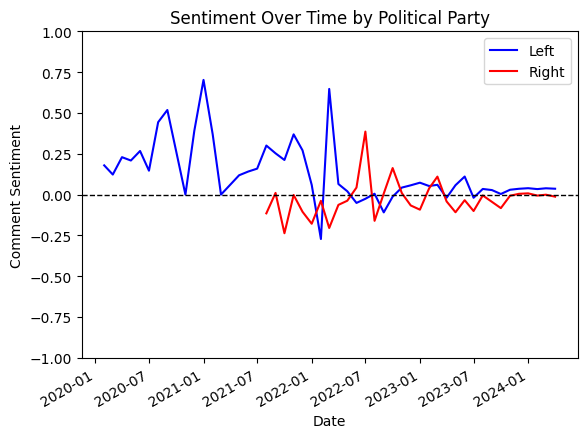

In [ ]:
sentiment_month_df = sentiment_df.groupby(['year', 'month', 'political_side'])[['comment_compound', 'comment_pos', 'comment_neu', 'comment_neg']].mean()
sentiment_month_df = sentiment_month_df.reset_index()

sentiment_month_left_df = sentiment_month_df.query("political_side == 'left'").copy()
sentiment_month_left_df.loc[:, 'date'] = pd.to_datetime(sentiment_month_left_df[['year', 'month']].assign(day=1))

sentiment_month_right_df = sentiment_month_df.query("political_side == 'right'").copy()
sentiment_month_right_df.loc[:, 'date'] = pd.to_datetime(sentiment_month_right_df[['year', 'month']].assign(day=1))

left_line = sentiment_month_left_df.plot.line(x='date', y='comment_compound', label='Left', color='blue')
right_line = sentiment_month_right_df.plot.line(x='date', y='comment_compound', label='Right', color='red', ax=left_line)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.xlabel('Date')
plt.ylabel('Comment Sentiment')
plt.title('Sentiment Over Time by Political Party')

plt.ylim(-1, 1)

plt.legend()
plt.show()

Plot the rate of positive, negative, and neutral comments for both left and right leaning subreddits.

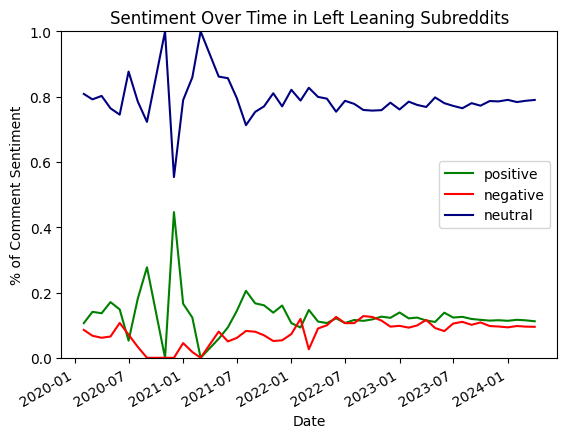

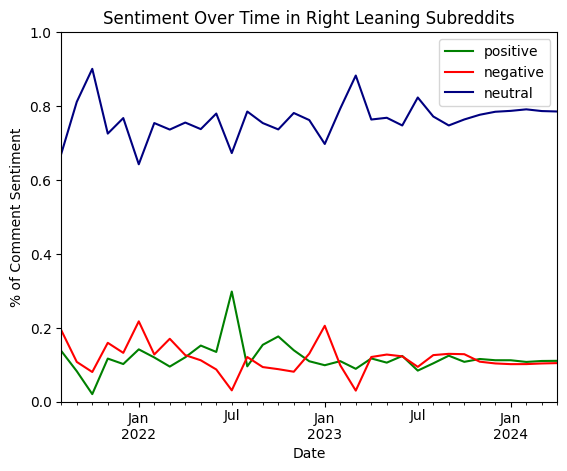

In [ ]:
sentiment_month_left_df.plot.line(x='date',
                                  y=['comment_pos', 'comment_neg', 'comment_neu'],
                                  label=['positive', 'negative', 'neutral'],
                                  color=['green', 'red', 'navy']
                                  )

plt.xlabel('Date')
plt.ylabel('% of Comment Sentiment')
plt.title('Sentiment Over Time in Left Leaning Subreddits')

plt.ylim(0, 1)

plt.legend()
plt.show()



sentiment_month_right_df.plot.line(x='date',
                   y=['comment_pos', 'comment_neg', 'comment_neu'],
                   label=['positive', 'negative', 'neutral'],
                   color=['green', 'red', 'navy'])

plt.xlabel('Date')
plt.ylabel('% of Comment Sentiment')
plt.title('Sentiment Over Time in Right Leaning Subreddits')

plt.ylim(0, 1)

plt.legend()
plt.show()


Now we group the sentiment data by day to analyze smaller intervals.

In [ ]:
sentiment_day_df = sentiment_df.groupby(['year', 'month', 'day', 'political_side'])[['comment_compound', 'comment_pos', 'comment_neu', 'comment_neg']].mean()
sentiment_day_df = sentiment_day_df.reset_index()

sentiment_day_left_df = sentiment_day_df.query("political_side == 'left'").copy()
sentiment_day_left_df.loc[:, 'date'] = pd.to_datetime(sentiment_day_left_df[['year', 'month', 'day']])

sentiment_day_right_df = sentiment_day_df.query("political_side == 'right'").copy()
sentiment_day_right_df.loc[:, 'date'] = pd.to_datetime(sentiment_day_right_df[['year', 'month', 'day']])

There are some interesting trends in 2022, so we can plot the graphs between Feb 2022 and Apr 2022 as well as in Jul 2022.

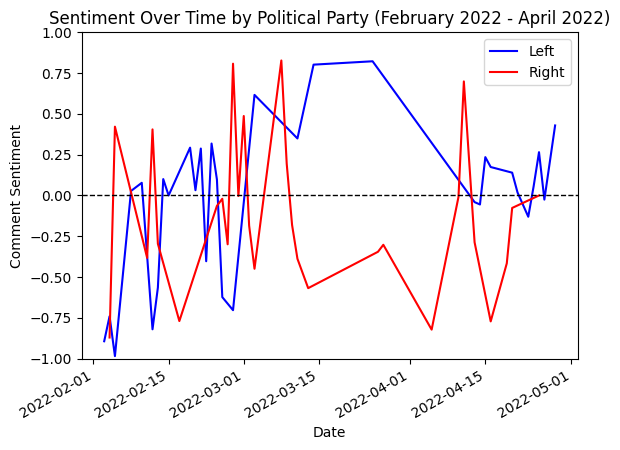

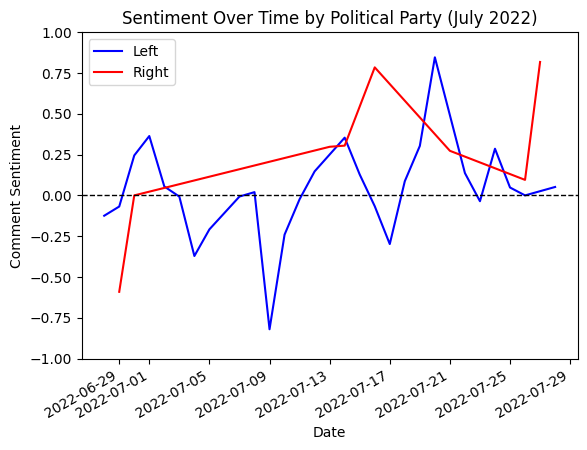

In [ ]:
start_date = pd.to_datetime('2022-02-01')
end_date = pd.to_datetime('2022-04-28')

feb_apr_2022_left = sentiment_day_left_df[(sentiment_day_left_df['date'].between(start_date, end_date))]
feb_apr_2022_right = sentiment_day_right_df[(sentiment_day_right_df['date'].between(start_date, end_date))]

left_line = feb_apr_2022_left.plot.line(x='date', y='comment_compound', label='Left', color='blue')
right_line = feb_apr_2022_right.plot.line(x='date', y='comment_compound', label='Right', color='red', ax=left_line)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.xlabel('Date')
plt.ylabel('Comment Sentiment')
plt.title('Sentiment Over Time by Political Party (February 2022 - April 2022)')

plt.ylim(-1, 1)

plt.legend()
plt.show()


start_date = pd.to_datetime('2022-06-28')
end_date = pd.to_datetime('2022-07-28')

jul_2022_left = sentiment_day_left_df[(sentiment_day_left_df['date'].between(start_date, end_date))]
jul_2022_right = sentiment_day_right_df[(sentiment_day_right_df['date'].between(start_date, end_date))]

left_line = jul_2022_left.plot.line(x='date', y='comment_compound', label='Left', color='blue')
right_line = jul_2022_right.plot.line(x='date', y='comment_compound', label='Right', color='red', ax=left_line)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.xlabel('Date')
plt.ylabel('Comment Sentiment')
plt.title('Sentiment Over Time by Political Party (July 2022)')

plt.ylim(-1, 1)

plt.legend()
plt.show()

Next we need to plot the emotion data. First we will plot the normalized freqency of each emotion for each political party.

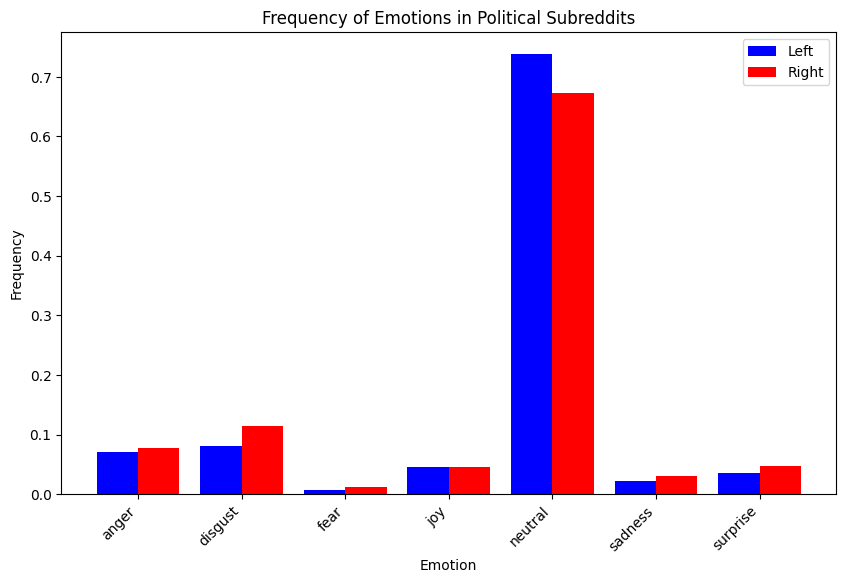

In [ ]:
emotion_counts = emotion_df.groupby(['political_side', 'emotion_label']).size().reset_index(name='count')

#pivot the data so that our data can be properly graphed
emotion_counts = emotion_counts.pivot_table(index='political_side', columns='emotion_label', values='count', fill_value=0)

#normalize the counts
emotion_frequency = emotion_counts.div(emotion_counts.sum(axis=1), axis=0)

emotion_frequency = emotion_frequency.reset_index()

fig, ax = plt.subplots(figsize=(10, 6))

emotion_labels = emotion_frequency.columns[1:]

x = np.arange(len(emotion_labels))

left_frequency = emotion_frequency.loc[emotion_frequency['political_side'] == 'left', emotion_labels].values[0]
ax.bar(x - 0.2, left_frequency, width=0.4, label='Left', color='blue')

right_frequency = emotion_frequency.loc[emotion_frequency['political_side'] == 'right', emotion_labels].values[0]
ax.bar(x + 0.2, right_frequency, width=0.4, label='Right', color='red')

ax.set_xticks(x)
ax.set_xticklabels(emotion_labels, rotation=45, ha='right')

ax.set_title('Frequency of Emotions in Political Subreddits')
ax.set_xlabel('Emotion')
ax.set_ylabel('Frequency')

ax.legend()
plt.show()

Finally, we plot the frequency of the emotions over time. We have graphs both including and excluding neutral to better see the other emotions.

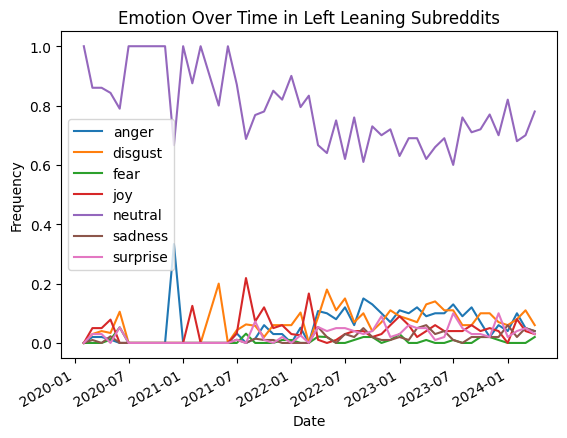

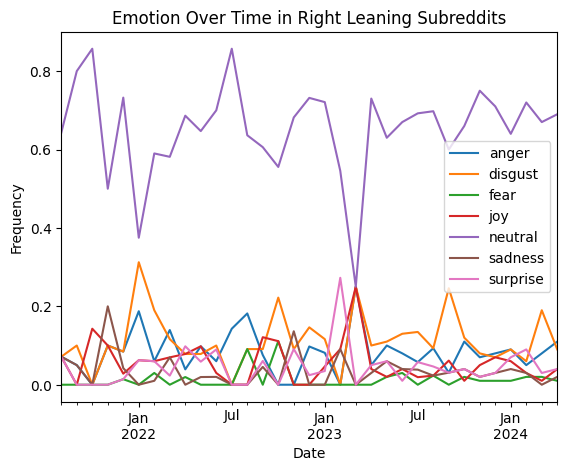

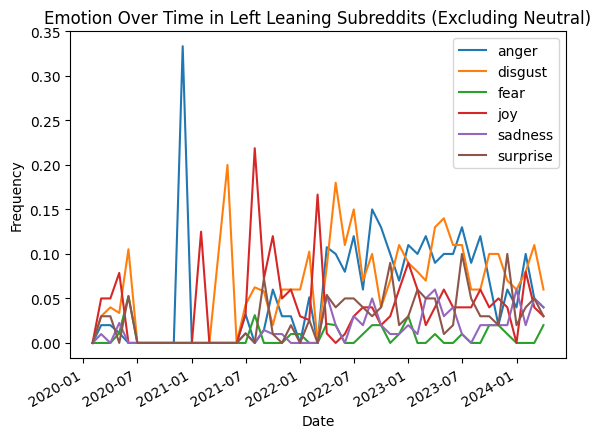

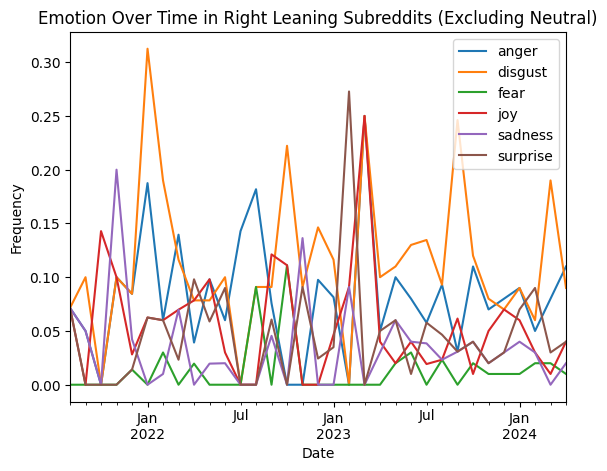

In [ ]:
emotion_counts = emotion_df.groupby(['political_side', 'emotion_label', 'year', 'month']).size().reset_index(name='count')

emotion_counts['date'] = pd.to_datetime(emotion_counts[['year', 'month']].assign(day=1))

total_counts = emotion_counts.groupby(['political_side', 'date'])['count'].transform('sum')

emotion_counts['normalized_count'] = emotion_counts['count'] / total_counts

emotion_counts_pivot = emotion_counts.pivot_table(index=['political_side', 'date'],
                                                   columns='emotion_label',
                                                   values='normalized_count',
                                                   fill_value=0)

emotion_counts_pivot_nonneutral = emotion_counts_pivot.drop('neutral', axis=1, level=None)
emotion_counts_pivot_nonneutral = emotion_counts_pivot_nonneutral.reset_index()

emotion_counts_pivot = emotion_counts_pivot.reset_index()

emotion_counts_left = emotion_counts_pivot[emotion_counts_pivot['political_side'] == 'left']
emotion_counts_left_nonneutral = emotion_counts_pivot_nonneutral[emotion_counts_pivot_nonneutral['political_side'] == 'left']

emotion_counts_left.plot.line(x='date', y=emotion_counts_left.columns[2:])
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Emotion Over Time in Left Leaning Subreddits')
plt.legend()
plt.show()

emotion_counts_right = emotion_counts_pivot[emotion_counts_pivot['political_side'] == 'right']
emotion_counts_right_nonneutral = emotion_counts_pivot_nonneutral[emotion_counts_pivot_nonneutral['political_side'] == 'right']

emotion_counts_right.plot.line(x='date', y=emotion_counts_right.columns[2:])
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Emotion Over Time in Right Leaning Subreddits')
plt.legend()
plt.show()

emotion_counts_left_nonneutral.plot.line(x='date', y=emotion_counts_left_nonneutral.columns[2:])
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Emotion Over Time in Left Leaning Subreddits (Excluding Neutral)')
plt.legend()
plt.show()

emotion_counts_right_nonneutral.plot.line(x='date', y=emotion_counts_right_nonneutral.columns[2:])
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Emotion Over Time in Right Leaning Subreddits (Excluding Neutral)')
plt.legend()
plt.show()

# Section 4: Conclusion

## Results

**Sentiment:**
<br>
We can see an increase in sentiment for left leaning subreddits around President Biden's election and inauguration. We do not have data for right leaning subreddits from that time period, but it is likely that we would see a decrease in sentiment for those subreddits around that time. There was a drop in sentiment followed by a drastic increase in sentiment in the beginning of 2022 for left leaning subreddits; this might be explained by Russia's invasion of Ukraine. The sentiment dropped around the time that Russia invaded Ukraine and then the sentiment increased when the United States started sending supplies to Ukraine. Recently, all subreddits have been relatively neutral in their sentiment.
<br>
<br>
**Emotion:**
<br>
The vast majority of the comments were labeled as neutral, and almost none of the comments were labeled as fear. Right leaning subreddits were more emotional than left leaning subreddits with a higher frequency of emotion for each of the labels except neutral. Overall, the frequencies of emotions were quite similar between parties. In left leaning subreddits, we observe a massive increase in angry comments around January 2021; this is most likely explained by the attack on the Capitol on January 6, 2021.


## Limitations

We encountered a few issues while working on this project. First, the data we has was not evenly distributed between different time periods, so there were some areas where we had very little data to rely on. Second, we had significantly more data for left leaning subreddits than right leaning ones, so we could not compare the two before 2022. Also, even though we separated the comments into left and right, there was no way for us to tell whether or not these comments were actually by someone who was on that political side. There could have been trolls or bots or people just posting in the wrong subreddit. Lastly, the emotion model was slow, so we were not able to run it on every single comment, and it was hard to tell how good the model even was. However, we did see some patterns, like an increase in anger in left leaning subreddits around a time when democrats would be angry. With these limitations in mind, it would be interesting to run this experiment again in the future with more data and maybe a better emotion detection model.